# Beginning Analysis of NHTSA Data

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode

In [3]:
from io import StringIO
import requests
import json
import pandas as pd

In [8]:
df_accidents = pd.read_csv("Data/2015/accident.csv")
df_accidents.head(10)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0
5,1,10006,1,1,0,0,0,2,2,111,...,99,10,17,99,99,0,0,0,1,0
6,1,10007,1,1,0,0,0,2,2,89,...,99,18,38,99,99,0,0,0,1,0
7,1,10008,1,1,0,1,1,1,1,73,...,99,21,48,99,99,0,0,0,1,0
8,1,10009,1,1,0,0,0,1,1,117,...,99,8,3,88,88,0,0,0,1,0
9,1,10010,2,2,0,0,0,2,2,33,...,99,19,1,99,99,0,0,0,1,0


In [13]:
df_vehicles = pd.read_csv("Data/2015/vehicle.csv")
df_vehicles.head(10)

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,1,10001,1,1,1,1,1,2,40,35,...,0,0,14,13,99,1,4,1,1,1
1,1,10002,1,1,1,1,1,22,13,34,...,0,0,14,6,1,4,4,7,1,0
2,1,10003,1,1,2,1,1,1,25,42,...,0,0,1,13,1,1,4,1,1,1
3,1,10004,1,1,1,4,1,0,57,53,...,0,0,14,13,1,1,4,1,1,1
4,1,10005,1,2,1,7,1,7,9,12,...,0,0,11,15,1,1,1,68,1,0
5,1,10005,2,2,1,7,1,7,9,12,...,0,0,1,62,9,1,1,69,0,0
6,1,10006,1,1,2,8,1,9,59,1,...,0,0,14,13,6,4,4,7,1,0
7,1,10007,1,1,2,8,1,18,33,43,...,0,0,1,13,1,1,4,1,1,0
8,1,10008,1,1,1,3,1,21,30,8,...,0,0,99,80,99,9,9,13,0,0
9,1,10009,1,1,1,13,1,8,0,23,...,0,0,1,13,99,1,4,1,1,0


In [17]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48923 entries, 0 to 48922
Columns: 102 entries, STATE to DR_DRINK
dtypes: int64(87), object(15)
memory usage: 38.1+ MB


In [19]:
df_vehicles.describe()

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
count,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,...,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000
mean,27.621242,276902.800033,1.503996,1.999285,1.752693,15.501523,6.774728,13.401120,28.878585,16.191812,...,3.296772,0.626045,5.844756,41.929031,48.486724,2.061566,2.154038,45.211414,0.586043,0.186191
std,16.277857,162716.761472,1.528479,2.475310,4.987042,8.744497,3.353681,9.146175,18.066774,12.140018,...,11.242508,1.307661,11.703704,29.278811,48.184547,2.464732,1.643129,35.722178,0.597758,0.389264
min,1.000000,10001.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,122161.000000,1.000000,1.000000,1.000000,8.000000,4.000000,8.000000,14.000000,12.000000,...,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,1.000000,13.000000,0.000000,0.000000
50%,27.000000,270341.000000,1.000000,2.000000,1.000000,15.000000,7.000000,14.000000,29.000000,12.000000,...,0.000000,0.000000,1.000000,51.000000,8.000000,1.000000,1.000000,50.000000,1.000000,0.000000
75%,42.000000,420659.500000,2.000000,2.000000,2.000000,23.000000,10.000000,18.000000,44.000000,12.000000,...,0.000000,0.000000,11.000000,62.000000,99.000000,1.000000,4.000000,82.000000,1.000000,0.000000
max,56.000000,560130.000000,58.000000,58.000000,99.000000,31.000000,12.000000,99.000000,99.000000,99.000000,...,99.000000,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,99.000000,10.000000,1.000000


In [5]:
#Get total count of records in accidents frame
len(df_accidents.index)

32538

In [20]:
#Find blank or whitespace
df_vehicles = df_vehicles.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df_vehicles.isnull().sum()

STATE       0
ST_CASE     0
VEH_NO      0
VE_FORMS    0
NUMOCCS     0
           ..
PCRASH4     0
PCRASH5     0
ACC_TYPE    0
DEATHS      0
DR_DRINK    0
Length: 102, dtype: int64

In [18]:
#Get total count of records in accidents frame
len(df_vehicles.index)

48923

In [6]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32538 entries, 0 to 32537
Data columns (total 52 columns):
STATE         32538 non-null int64
ST_CASE       32538 non-null int64
VE_TOTAL      32538 non-null int64
VE_FORMS      32538 non-null int64
PVH_INVL      32538 non-null int64
PEDS          32538 non-null int64
PERNOTMVIT    32538 non-null int64
PERMVIT       32538 non-null int64
PERSONS       32538 non-null int64
COUNTY        32538 non-null int64
CITY          32538 non-null int64
DAY           32538 non-null int64
MONTH         32538 non-null int64
YEAR          32538 non-null int64
DAY_WEEK      32538 non-null int64
HOUR          32538 non-null int64
MINUTE        32538 non-null int64
NHS           32538 non-null int64
RUR_URB       32538 non-null int64
FUNC_SYS      32538 non-null int64
RD_OWNER      32538 non-null int64
ROUTE         32538 non-null int64
TWAY_ID       32538 non-null object
TWAY_ID2      8530 non-null object
MILEPT        32538 non-null int64
LATITUDE      3

In [7]:
df_accidents.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,...,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000
mean,27.484049,275542.163470,1.556273,1.520622,0.035651,0.217100,0.225890,2.282562,2.291352,91.316737,...,63.545301,57.186582,65.025877,71.036880,75.622872,1.233481,0.219005,0.124839,1.090540,0.291321
std,16.283983,162763.509273,0.888945,0.851890,0.267064,0.482805,0.509181,1.938906,1.943591,94.942054,...,36.687537,43.020830,36.563776,36.909266,30.992210,5.613701,3.680911,3.409601,0.364769,0.472028
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122043.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,...,29.000000,14.000000,30.000000,21.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,270272.500000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,71.000000,...,59.000000,88.000000,88.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,420531.750000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,115.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,56.000000,560130.000000,58.000000,58.000000,11.000000,16.000000,16.000000,93.000000,93.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,10.000000,3.000000


In [8]:
#Find blank or whitespace
df_accidents = df_accidents.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df_accidents.isnull().sum()

STATE             0
ST_CASE           0
VE_TOTAL          0
VE_FORMS          0
PVH_INVL          0
PEDS              0
PERNOTMVIT        0
PERMVIT           0
PERSONS           0
COUNTY            0
CITY              0
DAY               0
MONTH             0
YEAR              0
DAY_WEEK          0
HOUR              0
MINUTE            0
NHS               0
RUR_URB           0
FUNC_SYS          0
RD_OWNER          0
ROUTE             0
TWAY_ID           0
TWAY_ID2      24008
MILEPT            0
LATITUDE          0
LONGITUD          0
SP_JUR            0
HARM_EV           0
MAN_COLL          0
RELJCT1           0
RELJCT2           0
TYP_INT           0
WRK_ZONE          0
REL_ROAD          0
LGT_COND          0
WEATHER1          0
WEATHER2          0
WEATHER           0
SCH_BUS           0
RAIL              0
NOT_HOUR          0
NOT_MIN           0
ARR_HOUR          0
ARR_MIN           0
HOSP_HR           0
HOSP_MN           0
CF1               0
CF2               0
CF3               0


In [9]:
#DF TWAY_ID2 can be removed, over 50% of data is null
df_accidents.NHS.unique()

array([0, 1, 9], dtype=int64)

In [10]:
#How many unique values?
for column in df_accidents:
    print(column, len(df_accidents[column].unique()))

STATE 51
ST_CASE 32538
VE_TOTAL 19
VE_FORMS 18
PVH_INVL 10
PEDS 11
PERNOTMVIT 12
PERMVIT 37
PERSONS 36
COUNTY 288
CITY 2098
DAY 31
MONTH 12
YEAR 1
DAY_WEEK 7
HOUR 25
MINUTE 61
NHS 3
RUR_URB 5
FUNC_SYS 10
RD_OWNER 22
ROUTE 9
TWAY_ID 15678
TWAY_ID2 7465
MILEPT 2272
LATITUDE 32249
LONGITUD 32319
SP_JUR 8
HARM_EV 51
MAN_COLL 11
RELJCT1 4
RELJCT2 15
TYP_INT 10
WRK_ZONE 5
REL_ROAD 12
LGT_COND 9
WEATHER1 13
WEATHER2 12
WEATHER 13
SCH_BUS 2
RAIL 111
NOT_HOUR 26
NOT_MIN 63
ARR_HOUR 26
ARR_MIN 64
HOSP_HR 26
HOSP_MN 65
CF1 25
CF2 18
CF3 7
FATALS 8
DRUNK_DR 4


In [9]:
toRemove = ("COUNTY", "CITY", "TWAY_ID", "TWAY_ID2", "VE_TOTAL", 
            "VE_FORMS", "YEAR", "NHS", "MILEPT", "LATITUDE", "LONGITUD", 
            "RELJCT1", "RELJCT2", "TYP_INT", "REL_ROAD", "PEDS", 
            "DAY", "MONTH", "DAY_WEEK", "HOUR", "MINUTE", "RUR_URB",
            "HOSP_HR", "HOSP_MN", "NOT_HOUR", "NOT_MIN", "ARR_HOUR",
            "ARR_MIN", "SP_JUR", "LGT_COND", "ROUTE", "RAIL", "WEATHER",
            "WEATHER1", "WEATHER2", "WRK_ZONE", "HARM_EV", "FUNC_SYS",
            "RD_OWNER")
df_accidents_copy = df_accidents

for item in toRemove:
    if item in df_accidents_copy:
        del df_accidents_copy[item]

#How many unique values?
for column in df_accidents_copy:
    print(column, len(df_accidents_copy[column].unique()))

STATE 51
ST_CASE 32538
PVH_INVL 10
PERNOTMVIT 12
PERMVIT 37
PERSONS 36
MAN_COLL 11
SCH_BUS 2
CF1 25
CF2 18
CF3 7
FATALS 8
DRUNK_DR 4


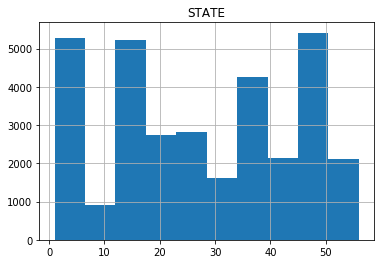

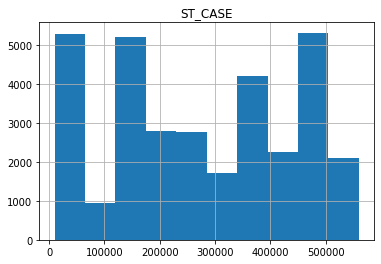

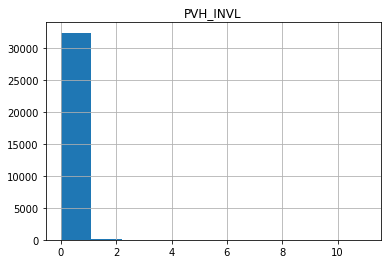

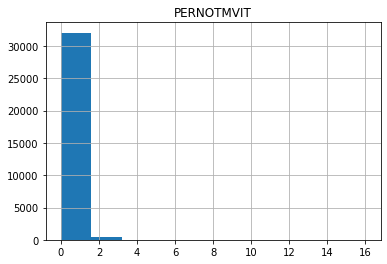

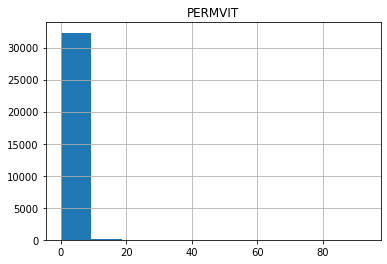

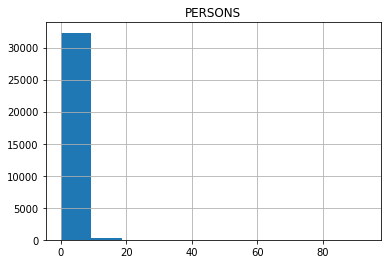

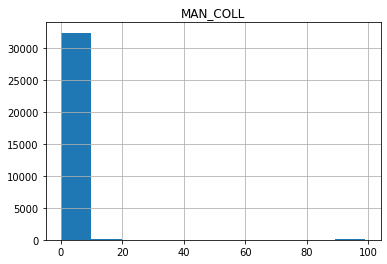

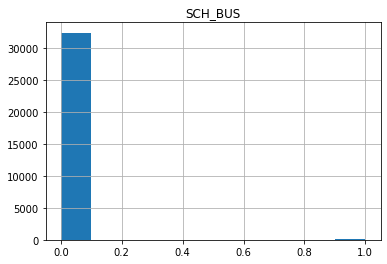

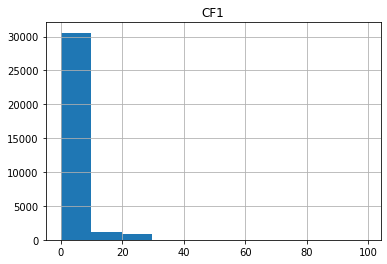

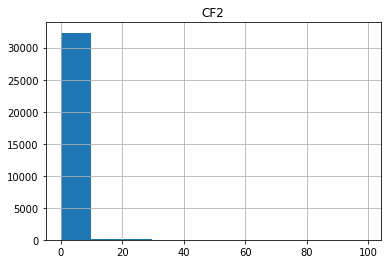

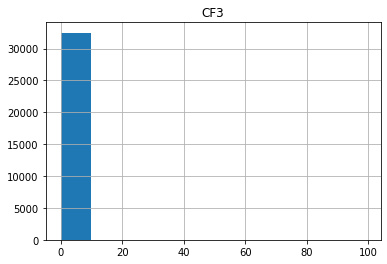

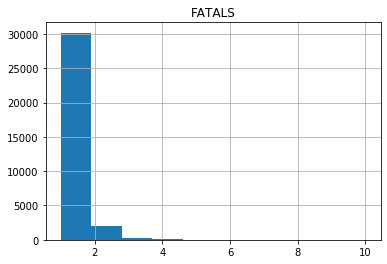

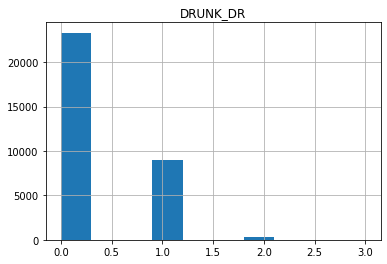

In [48]:
#Lets look at a historgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df_accidents_copy:
    df_accidents_copy.hist(column=col)

In [30]:
#Get Range
for col in df_accidents_copy:
    print(col, df[col].min(), df[col].max())

STATE 1 56
ST_CASE 10001 560130
PVH_INVL 0 11
PERNOTMVIT 0 16
PERMVIT 0 93
PERSONS 0 93
FUNC_SYS 1 99
RD_OWNER 1 99
ROUTE 1 9
HARM_EV 1 99
MAN_COLL 0 99
WRK_ZONE 0 4
WEATHER1 1 99
WEATHER2 0 12
WEATHER 1 99
SCH_BUS 0 1
RAIL 0 9999999
HOSP_HR 0 99
CF1 0 99
CF2 0 99
CF3 0 99
FATALS 1 10
DRUNK_DR 0 3


In [11]:
#Get Mean
for col in df_accidents_copy:
    print(col, df_accidents_copy[col].mean())

STATE 27.484049419140696
ST_CASE 275542.1634704038
PVH_INVL 0.035650623885918005
PERNOTMVIT 0.22588972893232528
PERMVIT 2.2825619275923534
PERSONS 2.2913516503780196
MAN_COLL 1.8090847624316184
SCH_BUS 0.0032577294240580244
CF1 1.2334808531563095
CF2 0.2190054705267687
CF3 0.12483865019361977
FATALS 1.0905402913516504
DRUNK_DR 0.29132091708156616


In [10]:
#Calculate correlation
df_accidents_copy.corr()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR
STATE,1.000000,0.999990,-0.008025,-0.055092,0.007066,0.007636,-0.016672,0.001050,-0.023486,-0.004223,-0.007940,0.009702,0.008524
ST_CASE,0.999990,1.000000,-0.007960,-0.054755,0.007122,0.007693,-0.016699,0.001026,-0.023436,-0.004261,-0.008005,0.009717,0.008380
PVH_INVL,-0.008025,-0.007960,1.000000,0.161593,-0.012451,0.010068,-0.015146,0.004485,0.121323,0.036453,0.008039,0.007248,0.028785
PERNOTMVIT,-0.055092,-0.054755,0.161593,1.000000,-0.173519,-0.150076,-0.131004,-0.006296,0.075308,0.036081,0.007886,-0.034331,-0.188258
PERMVIT,0.007066,0.007122,-0.012451,-0.173519,1.000000,0.997428,0.182250,0.086524,0.069173,0.008830,-0.004383,0.277577,-0.038028
PERSONS,0.007636,0.007693,0.010068,-0.150076,0.997428,1.000000,0.180638,0.086335,0.075114,0.011706,-0.003026,0.277606,-0.037846
MAN_COLL,-0.016672,-0.016699,-0.015146,-0.131004,0.182250,0.180638,1.000000,0.013926,0.008196,0.010042,0.009946,0.035579,-0.044252
SCH_BUS,0.001050,0.001026,0.004485,-0.006296,0.086524,0.086335,0.013926,1.000000,-0.008527,-0.003402,-0.002093,-0.000883,-0.022715
CF1,-0.023486,-0.023436,0.121323,0.075308,0.069173,0.075114,0.008196,-0.008527,1.000000,0.629576,0.597785,0.020385,-0.009780
CF2,-0.004223,-0.004261,0.036453,0.036081,0.008830,0.011706,0.010042,-0.003402,0.629576,1.000000,0.923304,0.012539,-0.010577


In [23]:
vehiclesToKeep = ["ST_CASE", "MAKE", "MODEL", "MOD_YEAR"]
df_vehicles_copy = df_vehicles[vehiclesToKeep]


#How many unique values?
for column in df_vehicles_copy:
    print(column, len(df_vehicles_copy[column].unique()))

ST_CASE 32166
MAKE 68
MODEL 130
MOD_YEAR 77


In [22]:
df_vehicles

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,1,10001,1,1,1,1,1,2,40,35,...,0,0,14,13,99,1,4,1,1,1
1,1,10002,1,1,1,1,1,22,13,34,...,0,0,14,6,1,4,4,7,1,0
2,1,10003,1,1,2,1,1,1,25,42,...,0,0,1,13,1,1,4,1,1,1
3,1,10004,1,1,1,4,1,0,57,53,...,0,0,14,13,1,1,4,1,1,1
4,1,10005,1,2,1,7,1,7,9,12,...,0,0,11,15,1,1,1,68,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48918,56,560128,1,2,1,13,12,11,50,12,...,0,0,1,55,99,1,1,89,1,0
48919,56,560128,2,2,1,13,12,11,50,12,...,20,3,1,55,99,1,1,88,0,0
48920,56,560129,1,2,3,14,12,23,5,12,...,0,0,1,54,99,1,2,64,1,0
48921,56,560129,2,2,1,14,12,23,5,12,...,0,0,1,62,7,1,1,65,0,0


In [24]:
df_merge = pd.merge(df_accidents_copy, df_vehicles_copy, on="ST_CASE")

In [25]:
df_merge.head()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
0,1,10001,0,0,1,1,0,0,0,0,0,1,1,12,481,2003
1,1,10002,0,0,1,1,0,0,0,0,0,1,0,49,40,2006
2,1,10003,0,0,2,2,0,0,0,0,0,1,1,20,37,2008
3,1,10004,0,0,1,1,0,0,0,0,0,1,1,12,481,2005
4,1,10005,0,0,2,2,6,0,0,0,0,1,0,69,54,2006


In [26]:
df_merge.corr()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
STATE,1.000000,0.999990,0.000490,-0.030155,0.016373,0.017112,-0.016397,0.004685,-0.026083,-0.001344,-0.009139,0.013371,-0.007418,-0.028628,0.019859,-0.032821
ST_CASE,0.999990,1.000000,0.000545,-0.029917,0.016389,0.017128,-0.016432,0.004663,-0.025998,-0.001359,-0.009201,0.013385,-0.007497,-0.028486,0.019870,-0.032706
PVH_INVL,0.000490,0.000545,1.000000,0.250730,0.036870,0.050399,-0.013763,0.002069,0.120155,0.043252,0.008168,0.014830,0.018699,0.000645,-0.015939,-0.006032
PERNOTMVIT,-0.030155,-0.029917,0.250730,1.000000,-0.078474,-0.062913,-0.122586,-0.010885,0.095584,0.063039,0.012707,-0.008701,-0.137823,0.011758,-0.010446,0.151834
PERMVIT,0.016373,0.016389,0.036870,-0.078474,1.000000,0.999222,0.074447,0.052874,0.101861,0.019532,-0.000413,0.171101,-0.054879,-0.008037,-0.005351,-0.033100
PERSONS,0.017112,0.017128,0.050399,-0.062913,0.999222,1.000000,0.073792,0.052701,0.105501,0.022002,0.000406,0.172038,-0.054671,-0.007555,-0.005130,-0.033228
MAN_COLL,-0.016397,-0.016432,-0.013763,-0.122586,0.074447,0.073792,1.000000,0.010938,-0.008589,-0.004833,-0.005994,0.022419,-0.042689,0.032350,0.025632,0.033202
SCH_BUS,0.004685,0.004663,0.002069,-0.010885,0.052874,0.052701,0.010938,1.000000,-0.008458,-0.004690,-0.002327,-0.003401,-0.023481,0.057830,0.059720,-0.010296
CF1,-0.026083,-0.025998,0.120155,0.095584,0.101861,0.105501,-0.008589,-0.008458,1.000000,0.558508,0.506933,0.019465,-0.016518,0.025177,0.008586,0.000675
CF2,-0.001344,-0.001359,0.043252,0.063039,0.019532,0.022002,-0.004833,-0.004690,0.558508,1.000000,0.872775,0.018232,-0.014487,0.011863,0.002338,0.001737


In [27]:
df_merge.describe()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,SCH_BUS,CF1,CF2,CF3,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
count,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000
mean,27.618942,276879.885437,0.033194,0.170944,3.007879,3.016925,2.581860,0.004441,1.561600,0.246541,0.107625,1.113274,0.277055,36.331839,360.179539,2192.216478
std,16.271162,162650.087618,0.267259,0.483379,3.797021,3.803868,5.929855,0.066493,5.926987,3.510979,3.088590,0.414472,0.473458,26.227758,304.505627,1209.858447
min,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1923.000000
25%,12.000000,122163.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,37.000000,2001.000000
50%,27.000000,270342.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,404.000000,2005.000000
75%,42.000000,420653.000000,0.000000,0.000000,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,51.000000,482.000000,2010.000000
max,56.000000,560130.000000,11.000000,16.000000,93.000000,93.000000,99.000000,1.000000,99.000000,99.000000,99.000000,10.000000,3.000000,99.000000,999.000000,9999.000000


In [29]:
#Get Mean
for col in df_merge:
    print(col, df_accidents_copy[col].mode())

STATE 0    48
dtype: int64
ST_CASE 0         10001
1         10002
2         10003
3         10004
4         10005
          ...  
32533    560126
32534    560127
32535    560128
32536    560129
32537    560130
Length: 32538, dtype: int64
PVH_INVL 0    0
dtype: int64
PERNOTMVIT 0    0
dtype: int64
PERMVIT 0    1
dtype: int64
PERSONS 0    1
dtype: int64
MAN_COLL 0    0
dtype: int64
SCH_BUS 0    0
dtype: int64
CF1 0    0
dtype: int64
CF2 0    0
dtype: int64
CF3 0    0
dtype: int64
FATALS 0    1
dtype: int64
DRUNK_DR 0    0
dtype: int64


KeyError: 'MAKE'